<a href="https://colab.research.google.com/github/anirudhjaju/Logistic-Regression/blob/main/Task_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
x = df.drop(['left'], axis=1)
y = df['left']
Department=pd.get_dummies(x['Department'],drop_first=True)
salary=pd.get_dummies(x['salary'],drop_first=True)
x=x.drop(['Department','salary'],axis=1)
x=pd.concat([x,Department,salary],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=5)

In [ ]:
mymodel=LogisticRegression(random_state=1,max_iter=1000000)
mymodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=mymodel.predict(x_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3453,  287],
       [ 799,  411]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7806060606060606


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred))

0.5888252148997135


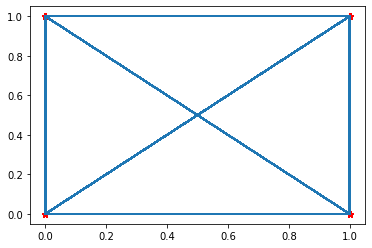

In [ ]:
plt.scatter(y_test,y_pred,c='red',marker='*')
plt.plot(y_test,y_pred)
plt.show()